In [77]:
%matplotlib inline

import numpy as np
import pandas as pd
from  matplotlib import pyplot
import seaborn as sns

In [9]:
train_df = pd.read_csv('data/train.csv', index_col='row_id')

In [14]:
train_df.describe()

,x,y,accuracy,time,place_id
count,29118021.000000,29118021.000000,29118021.000000,29118021.000000,2.911802e+07
mean,4.999770,5.001814,82.849125,417010.364723,5.493787e+09
std,2.857601,2.887505,114.751772,231176.146498,2.611088e+09
min,0.000000,0.000000,1.000000,1.000000,1.000016e+09
25%,2.534700,2.496700,27.000000,203057.000000,3.222911e+09
50%,5.009100,4.988300,62.000000,433922.000000,5.518573e+09
75%,7.461400,7.510300,75.000000,620491.000000,7.764307e+09
max,10.000000,10.000000,1033.000000,786239.000000,9.999932e+09


We'd probably prefer to treat the place_id as a string.

In [40]:
train_df['place_id'] = train_df['place_id'].astype(str)

The (x,y) coordinates seem to be uniformly distributed in the 10x10 grid.

The maximum accuracy value is 1033, but given the percentiles, that looks more like an outlier, so let's take a closer look at that column.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a7dda90>]], dtype=object)

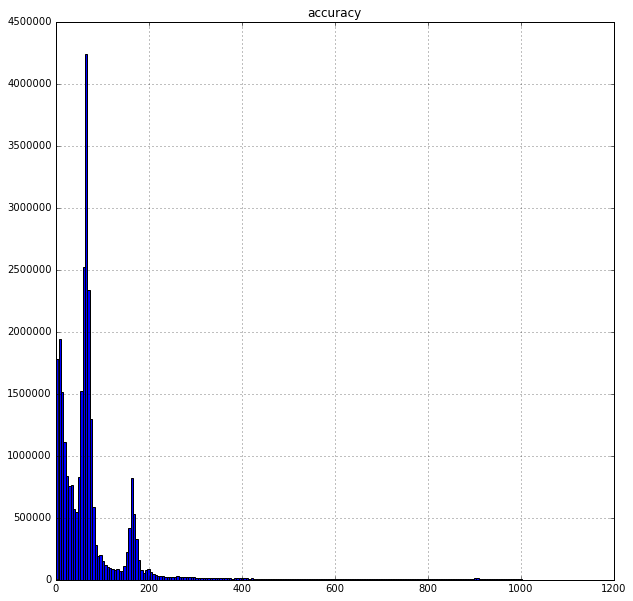

In [41]:
pd.DataFrame.hist(train_df, 'accuracy', bins=200, figsize=(10,10))

The range of values is quite big, but most of the mass is concentrated in the 0-200 and especially the 0-100 range. Let's quantify that.

In [42]:
def percentage_lt(x): return train_df[train_df.accuracy < x].size/train_df.size * 100.0
print("Less than 100: {:f} %".format(percentage_lt(100)))
print("Less than 200: {:f} %".format(percentage_lt(200)))
print("Less than 500: {:f} %".format(percentage_lt(500)))
print("Less than 1000: {:f} %".format(percentage_lt(1000)))

Less than 100: 81.808513 %
Less than 200: 94.580717 %
Less than 500: 98.052625 %
Less than 1000: 99.988540 %


Let's now visualize a random subset of places and the distribution of checkin locations

In [57]:
all_places = train_df['place_id'].unique()

In [87]:
def plot_random_locations(num_locations):
    np.random.shuffle(all_places)
    selected_locations = all_places[:num_locations]
    selected_df = train_df[train_df['place_id'].isin(selected_locations)]
    fg = sns.FacetGrid(data=selected_df, hue='place_id', size=10)
    fg.map(pyplot.scatter, 'x', 'y').add_legend()

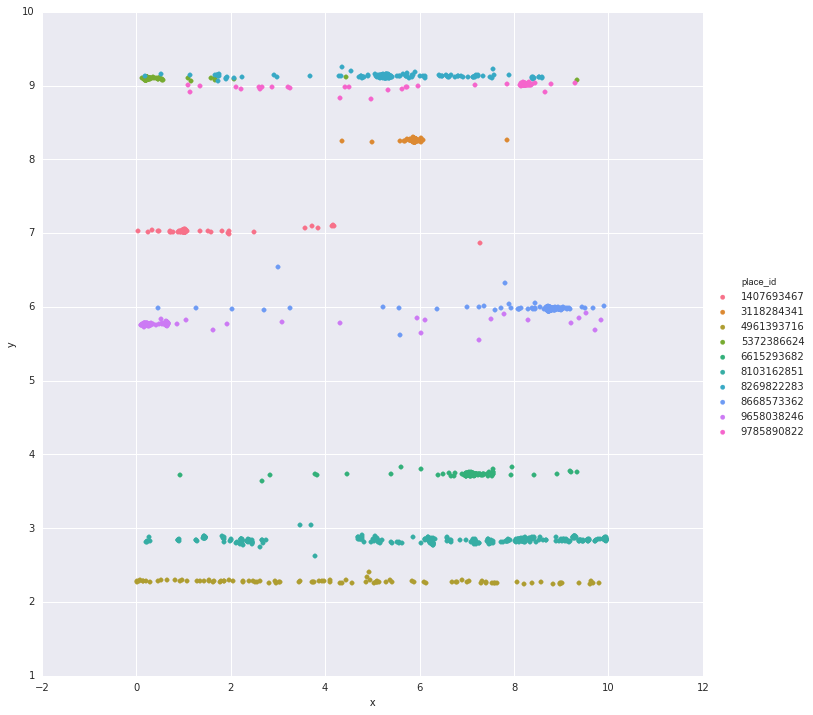

In [91]:
plot_random_locations(10)